# Problem 50
Given an undirected graph represented as an adjacency matrix and an integer `k`, write a function to determine whether each vertex in the graph can be colored such that no two adjacent vertices share the same color using at most `k` colors.

---
## Solution

In [193]:
# solution code
import random
import numpy as np

def random_adjacent_matrix(graph_nodes, connections_amount):
    connections = []
    if(connections_amount >= graph_nodes**2):
        connections = [[i,j] for j in range(graph_nodes) for i in range(graph_nodes)]
    else:
        while(len(connections) != connections_amount):
            point = [random.randint(0,graph_nodes-1),random.randint(0,graph_nodes-1)]
            if(point in connections):continue
            else: connections.append(point)
    matrix_points = [[i[0], i[1]] for i in connections] + [[i[1], i[0]] for i in connections]
    max_point = max(max(i) for i in matrix_points)
    matrix = [[1 if [j, i] in matrix_points else 0 for i in range(max_point+1)] for j in range(max_point+1)]
    return matrix

def print_matrix(matrix):
    print(f"Adjacency Matrix:\n{'-'*20}\n{np.matrix(matrix)}\n")

def adjacent_matrix_coloring(matrix, k): 
    connections = {i:[[], 0]for i in range(len(matrix))}
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if(matrix[j][i] == 1):
                # removes nodes connections adjacent to themselves
                if(j == i): continue
                else: connections[j][0].append(i)
    colors_used = 0
    first_node = 0
    color_to_nodes = []
    for key, value in connections.items():
        # nodes without adjacent nodes should stay the base color
        if(len(value[0]) == 0):
            continue
        else:
            # first connected node keeps the base color given
            if(first_node == 0):
                first_node += 1
                colors_used += 1
                color_to_nodes.append([value[0], colors_used, key])
                connections[key][1] = colors_used
                continue
            else:
                colors_connected = [i[1] for i in color_to_nodes if key in i[0]]
                # check the colors already used in the adjacent nodes
                available_colors = [i for i in range(1, k+1) if i not in colors_connected]

                # If there are no available colors, increase k or return False
                if len(available_colors) == 0:
                    if k >= len(color_to_nodes):
                        k = k
                    else:
                        return False

                # choose the first available color
                if(len(available_colors) == 0):
                    return False
                chosen_color = available_colors[0]
                colors_used += 1
                color_scheme = [value[0], chosen_color, key]
                color_to_nodes.append(color_scheme)
                connections[key][1] = chosen_color

    return True

In [194]:
# Found helpful function to visualize results on StackOverflow
# https://stackoverflow.com/questions/29572623/plot-networkx-graph-from-adjacency-matrix-in-csv-file

import matplotlib.pyplot as plt
import networkx as nx

def show_graph_with_labels(adjacency_matrix):
    print(f"Adjacency Matrix Graph:\n{'-'*20}")
    adjacency_matrix = np.matrix(adjacency_matrix)
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    all_rows = range(0, adjacency_matrix.shape[0])
    for n in all_rows:
        gr.add_node(n)
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, with_labels=True)
    plt.show()

---
## Test Cases

Adjacency Matrix:
--------------------
[[0 0 1 0 0 0 1 1]
 [0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0]]

Adjacency Matrix Graph:
--------------------


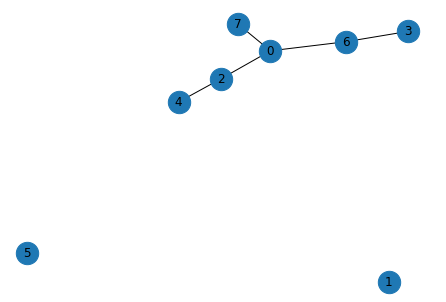

Coloring worked!
This adjacency matrix can be colored so that no two adjacent vertices share the same color using only 3 colors.


In [201]:
# solution testing test cases

k = 3
matrix = random_adjacent_matrix(9,5)
print_matrix(matrix)
show_graph_with_labels(matrix)
result = adjacent_matrix_coloring(matrix, k)
if(result == False):
    
    print(f"Coloring failed!\nThis adjacency matrix cannot be colored so that no two adjacent vertices share the same color using only {k} colors.")
else:
    print(f"Coloring worked!\nThis adjacency matrix can be colored so that no two adjacent vertices share the same color using only {k} colors.")

Adjacency Matrix:
--------------------
[[0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1]
 [0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0]
 [1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1]
 [0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0]
 [1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0]
 [0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0]
 [0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0]
 [1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0]
 [1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0]]

Adjacency Matrix Graph:
--------------------


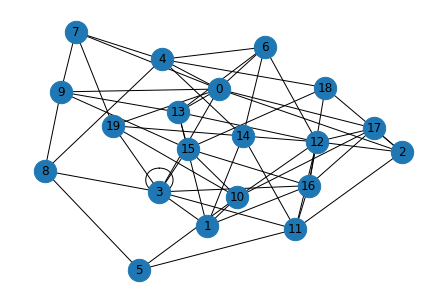

Coloring worked!
This adjacency matrix can be colored so that no two adjacent vertices share the same color using only 5 colors.


In [243]:
k = 5
matrix = random_adjacent_matrix(20,60)
print_matrix(matrix)
show_graph_with_labels(matrix)
result = adjacent_matrix_coloring(matrix, k)
if(result == False):
    print(f"Coloring failed!\nThis adjacency matrix cannot be colored so that no two adjacent vertices share the same color using only {k} colors.")
else:
    print(f"Coloring worked!\nThis adjacency matrix can be colored so that no two adjacent vertices share the same color using only {k} colors.")

Adjacency Matrix:
--------------------
[[1 1 1 1 1 0 1 1 0 1 0 1 0 1 1]
 [1 0 1 1 1 1 1 1 0 1 1 1 0 1 0]
 [1 1 0 1 1 1 0 1 1 1 1 0 1 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 0 0 1 1]
 [1 1 1 1 0 0 1 1 0 1 0 1 1 1 1]
 [0 1 1 1 0 1 0 1 0 1 1 1 1 0 1]
 [1 1 0 1 1 0 0 1 1 1 0 0 1 1 0]
 [1 1 1 1 1 1 1 0 1 1 1 1 1 0 0]
 [0 0 1 1 0 0 1 1 0 0 0 0 0 1 1]
 [1 1 1 1 1 1 1 1 0 1 1 1 0 1 1]
 [0 1 1 1 0 1 0 1 0 1 0 1 1 1 1]
 [1 1 0 0 1 1 0 1 0 1 1 0 1 1 1]
 [0 0 1 0 1 1 1 1 0 0 1 1 1 1 0]
 [1 1 0 1 1 0 1 0 1 1 1 1 1 1 0]
 [1 0 1 1 1 1 0 0 1 1 1 1 0 0 1]]

Adjacency Matrix Graph:
--------------------


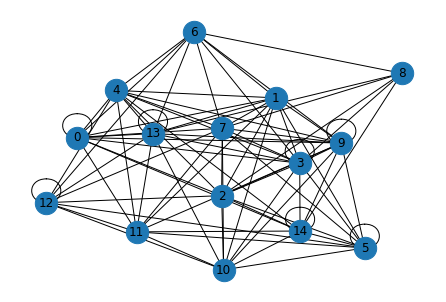

Coloring failed!
This adjacency matrix cannot be colored so that no two adjacent vertices share the same color using only 6 colors.


In [237]:
k = 6
matrix = random_adjacent_matrix(15,100)
print_matrix(matrix)
show_graph_with_labels(matrix)
result = adjacent_matrix_coloring(matrix, k)
if(result == False):
    print(f"Coloring failed!\nThis adjacency matrix cannot be colored so that no two adjacent vertices share the same color using only {k} colors.")
else:
    print(f"Coloring worked!\nThis adjacency matrix can be colored so that no two adjacent vertices share the same color using only {k} colors.")

---
## Solution Explained

### adjacent_matrix_coloring(matrix, k) solution
This code provides a solution to the problem of determining whether each vertex in a graph can be colored such that no two adjacent vertices share the same color using at most `k` colors.

- The `random_adjacent_matrix` function creates a random adjacency matrix for a given number of nodes and the number of connections between them. It first checks if the number of connections exceeds the maximum number of connections possible in a fully connected graph with the given number of nodes. If so, it generates all possible connections. Otherwise, it randomly generates connections until it reaches the desired number of connections or the number of connections reaches the maximum.

- The `print_matrix` function simply prints the adjacency matrix.

- The `adjacent_matrix_coloring` function takes an adjacency matrix and a number `k` as inputs, and returns `True` if it is possible to color the graph using at most `k` colors, and `False` otherwise. The function first creates a dictionary `connections` where each key is a node in the graph, and its value is a list of two elements: a list of its adjacent nodes, and the color assigned to it. Then, the function loops through the adjacency matrix and adds the adjacent nodes to the `connections` dictionary. The function then initializes some variables, including `colors_used`, `first_node`, and `color_to_nodes`. It loops through the `connections` dictionary and assigns base colors to nodes without any adjacent nodes. The first node with adjacent nodes is given the base color 1. If there are other nodes with adjacent nodes, they are assigned colors based on the colors used by their adjacent nodes. If there are no available colors to assign to a node, the function either increases `k` or returns `False`. Finally, the function returns `True` if all nodes are colored, and `False` otherwise.

- The `show_graph_with_labels` function uses the adjacency matrix to create a networkx graph and display it using matplotlib.

Overall, this code generates a random adjacency matrix, colors the nodes based on their adjacency, and displays the resulting graph with a result showing if the graph can be colored as requested so that no two adjacent vertices share the same color with a max of `k` color.